In [4]:
import PyWGCNA
import pandas as pd

In [16]:
#pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='CCLE', 
                              species='human', 
                              geneExpPath='./CCLE_depMap_18Q4_TPM_v2.csv', 
                              outputPath='./',
                              save=True, minModuleSize=10)
#pyWGCNA_5xFAD = pyWGCNA_5xFAD.runWGCNA()
#pyWGCNA_5xFAD.saveWGCNA()

Saving data to be True, checking requirements ...
Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1165
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1   0.40079 -1.238568       0.891164  1916.051781  1753.696353   
1       2  0.695457 -1.979141       0.960251   320.212122   244.092506   
2       3   0.76591 -2.308937       0.984742    78.596354     46.61957   
3       4  0.788794 -2.484113        0.99262    24.836797    11.231191   
4       5  0.806724 -2.450933       0.991132     9.448543     3.369401   
5       6  0.907806 -2.074256       0.987256      4.17004     1.223449   
6       7  0.943839 -2.064602       0.972297     2.086782     0.518045   
7       8  0.966107 -1.955486       0.973381     1.164235      0.23927   
8       9  0.970116 -1.843297       0.965378     0.713513      0.11569   
9   


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fb415f67be0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [17]:
pyWGCNA_5xFAD = PyWGCNA.readWGCNA('./CCLE.p')

Reading CCLE WGCNA done!


In [20]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="coral", n=10)#.to_csv('/cmnfs/home/students/a.schmucklermann/top_10_hub_genes.csv')
#pyWGCNA_5xFAD.geneExpr.to_df().to_csv('/cmnfs/home/students/a.schmucklermann/genes.csv')
#pyWGCNA_5xFAD.analyseWGCNA()

calculating adjacency matrix ...
	Done..



,connectivity,dynamicColors,moduleColors,moduleLabels
RP11-804H8.5 (ENSG00000228337),12.913656,coral,coral,3
RP11-94H6.1 (ENSG00000249441),12.655354,coral,coral,3
RP11-571E6.3 (ENSG00000203402),11.974064,coral,coral,3
AC004535.2 (ENSG00000236414),11.683878,coral,coral,3
RP11-756D7.1 (ENSG00000255309),10.650796,coral,coral,3
RPS28P1 (ENSG00000270912),9.882493,coral,coral,3
UBE2D3P4 (ENSG00000224188),9.402261,coral,coral,3
Metazoa_SRP (ENSG00000272244),8.072524,coral,coral,3
GS1-69O6.1 (ENSG00000270611),7.707722,coral,coral,3
CTC-261N6.2 (ENSG00000250124),7.690219,coral,coral,3


In [61]:
data = pyWGCNA_5xFAD.datExpr

In [36]:
modules = pyWGCNA_5xFAD.datExpr.var.moduleColors.unique().tolist()
modules
#pyWGCNA_5xFAD.CoexpressionModulePlot(modules=modules, numGenes=100, numConnections=1000, minTOM=0, file_name="all")

['whitesmoke',
 'maroon',
 'silver',
 'darksalmon',
 'gainsboro',
 'salmon',
 'darkred',
 'white',
 'firebrick',
 'seashell',
 'brown',
 'indianred',
 'lightgrey',
 'lightcoral',
 'coral',
 'lightsalmon',
 'orangered',
 'chocolate',
 'tomato',
 'saddlebrown',
 'rosybrown',
 'black']

In [18]:
eigengenes = pyWGCNA_5xFAD.moduleEigengenes(pyWGCNA_5xFAD.datExpr.to_df(), pyWGCNA_5xFAD.datExpr.var['dynamicColors'], nPC=10)

Calculating 22 module eigengenes in given set...
	Done..



In [9]:
modules = pyWGCNA_5xFAD.datExpr.var.moduleColors.unique().tolist()
#pyWGCNA_5xFAD.CoexpressionModulePlot(modules=modules, numGenes=100, numConnections=1000, minTOM=0, file_name="all")

In [5]:
CCLE_minmodule10 = PyWGCNA.readWGCNA('./CCLE_minmodule10.p')

Reading CCLE_minmodule10 WGCNA done!


In [7]:
CCLE_minmodule10_datExpr = CCLE_minmodule10.datExpr
CCLE_minmodule10_eigengenes = CCLE_minmodule10.moduleEigengenes(CCLE_minmodule10_datExpr.to_df(), 
                                            CCLE_minmodule10_datExpr.var['dynamicColors'], nPC=1)

Calculating 270 module eigengenes in given set...
	Done..



In [13]:
CCLE_minmodule10_eigengenes['validColors'] = CCLE_minmodule10_eigengenes['validColors'].reset_index()
CCLE_minmodule10_eigengenes['validColors'].rename({'index':'number of genes'}, axis='columns',inplace=True)
module_size = CCLE_minmodule10_eigengenes['validColors'].groupby('dynamicColors').count()


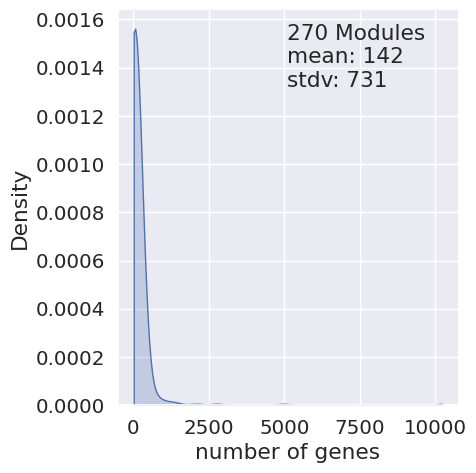

In [16]:
import seaborn as sns
sns.set(font_scale=1.3) 
g = sns.displot(module_size, x="number of genes",kind="kde" ,fill=True, cut = 0)
g.fig.text(0.6,0.8,'270 Modules\nmean: '+str(round(module_size.mean()[0]))+'\nstdv: '+str(round(module_size.std()[0])))
g.savefig('modules_270_.png', bbox_inches='tight', dpi=300)

In [21]:
eigengenes['validColors'] = eigengenes['validColors'].reset_index()
eigengenes['validColors'].rename({'index':'number of genes'}, axis='columns',inplace=True)
ms = eigengenes['validColors'].groupby('dynamicColors').count()

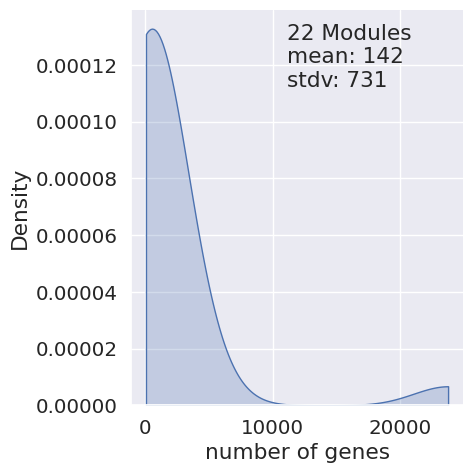

In [22]:
#import matplotlib as plt
sns.set(font_scale=1.3) 
g = sns.displot(ms, x="number of genes",kind="kde" ,fill=True, cut = 0)
g.fig.text(0.6,0.8,'22 Modules\nmean: '+str(round(module_size.mean()[0]))+'\nstdv: '+str(round(module_size.std()[0])))
g.savefig('modules_22_.png', bbox_inches='tight', dpi=300)